<a href="https://colab.research.google.com/github/gluoneros/greenPredEnergy/blob/main/ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final - TalentoTech**
### **Predicción de viabilidad de proyectos de energia renovable en Colombia**

> El proyecto fue realizado en el marco del curso de AI-ML TalentoTech

## **Descripcion** 🚀
_Este proyecto utiliza Python y Jupyter Notebook, pandas, numpy para el desarrollo del modelo de predicción de proyectos de energia renobable en los municipios de Colombia._

## **Tecnologías** 📗
_Se utilizan las siguientes tecnologias para el desarrollo del proyecto:_

* [ Python ](https://www.python.org/) -- <img height="20" src="https://cdn.simpleicons.org/python?viewbox=auto" />
* [Jupyter](https://jupyter.org/) -- <img height="20" src="https://cdn.simpleicons.org/jupyter?viewbox=auto" />
* [Pandas](https://pandas.pydata.org/) -- <img height="20" src="https://cdn.simpleicons.org/pandas?viewbox=auto" />
* [Numpy](https://numpy.org/) -- <img height="20" src="https://cdn.simpleicons.org/numpy?viewbox=auto" />
* [Scikit-learn](https://scikit-learn.org/stable/) -- <img height="20" src="https://cdn.simpleicons.org/scikitlearn?viewbox=auto" />
* [github](https://github.com) --<img height="20" src="https://cdn.simpleicons.org/github?viewbox=auto" />

## **Autores** 😊

* **Monica Garcia**
* **Juan Pablo Cardenas**
* **Juan Pablo Quevedo**
* **Hildebrando Vargas**
* **Jonathan Gutierrez**
* **Mary Luz Ceballosl**

## **Tareas**  ✒️

 - [Importar librerías necesarias](#Importar librerías necesarias)
 2. Cargar los Datos
 3. Explore y visualice los datos para obtener información.
 4. Prepare los datos para los algoritmos de machine learning.
 5. Generación de Estadísticas Descriptivas
 6. Visualización de datos utilizando gráficos de barras, histogramas y gráficos de dispersión
 7. Identificación y manejo de valores atípicos y tendencias en los datos
 8. Uso de técnicas como imputación de la media, mediana y regresión para completar datos faltantes.
 9. Eliminación de registros con datos faltantes o imputación de valores categóricos.
 10. Cálculo de la correlación entre variables.
 11. Aplicación de técnicas de reducción de dimensionalidad para reducir la dimensionalidad de los datos.
 12. Aplicación de PCA para reducir la dimensionalidad de datasets
 13. Aplicación de técnicas de regresión para predecir valores de variables.
 14. Ajusta tu modelo.
 15. Presente su solución.
 16. Inicie, supervise y mantenga su sistema.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Importar librerías necesarias

In [1]:
# importaciones
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# check modelos
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
# check escaladores
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, Normalizer
# normalización
import unicodedata
# clientes
# !pip install sodapy
from sodapy import Socrata
client = Socrata("www.datos.gov.co", None)

### Métodos

In [2]:
# Metododo para eliminar acentos y caracteres especiales
def removeAccents(_value):
  value = _value.upper().replace("Ñ", "%")
  value = unicodedata.normalize("NFKD", value).encode("ascii","ignore").decode("ascii").replace("%", "Ñ")
  return value

## DataSet 1 | Estado de la prestación del servicio de energía en Zonas No Interconectadas

#### Predecir basados en 	'energia_activa',	'energia_reactiva', 'potencia_maxima' 'prom_diario_horas' [Ver](https://www.datos.gov.co/Minas-y-Energ-a/Estado-de-la-prestaci-n-del-servicio-de-energ-a-en/3ebi-d83g/about_data)
##### cual sería el día de demanda maxima para que una localidad en una zona no interconectada limitara y optimizara su uso de energía en funcion del posible ahorro de esta.Y los habitantes en sus viviendas emplearan con anticipacion dichas disminusiones en el consumo energético gracias al día de demanda maxima predicho.

In [3]:
d_zni_ = client.get("3ebi-d83g", limit=5000)
d_zni = pd.DataFrame.from_records(d_zni_)
d_zni = d_zni.rename(columns={"mpio": "municipio"})
d_zni

,id_dpto,dpto,id_mpio,municipio,id_localidad,localidad,anio,mes,energia_activa,energia_reactiva,potencia_maxima,dia_demanda_maxima,fecha_demanda_maxima,prom_diario_horas
0,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2024,05,132215,41907,286.4,Jueves,2024-05-23T18:00:00.000,24
1,91,AMAZONAS,91798,TARAPACA (ANM),91798000,TARAPACA (TARAPACA (ANM) - AMAZONAS),2024,05,28132,12662,102.6,Viernes,2024-05-03T18:30:00.000,10.16
2,5,ANTIOQUIA,5873,VIGÍA DEL FUERTE,5873010,LA PLAYA MURRI (VIGÍA DEL FUERTE - ANTIOQUIA),2024,05,2686,1110,27.46,Martes,2024-05-21T19:45:00.000,4.19
3,88,ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,05,1331271,284638,2190.28,Viernes,2024-05-10T15:00:00.000,23.59
4,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,13001007,ISLA FUERTE (CARTAGENA DE INDIAS - BOLÍVAR),2024,05,64368,30561,247.59,Sábado,2024-05-18T22:00:00.000,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,76,VALLE DEL CAUCA,76109,BUENAVENTURA,76109032,SAN FRANCISCO NAYA (BUENAVENTURA - VALLE DEL C...,2024,08,7610,3285,31.23,Viernes,2024-08-02T19:15:00.000,10.05
4269,97,VAUPÉS,97161,CARURÚ,97161000,CARURÚ (CARURÚ - VAUPÉS),2024,08,31775,7881,87.82,Jueves,2024-08-29T18:45:00.000,16.39
4270,97,VAUPÉS,97001,MITÚ,97001000,MITÚ (MITÚ - VAUPÉS),2024,08,1590470,387197,3236.71,Miércoles,2024-08-21T13:00:00.000,23.56
4271,97,VAUPÉS,97666,TARAIRA,97666000,TARAIRA (TARAIRA - VAUPÉS),2024,08,39226,10719,136.84,Martes,2024-08-20T12:00:00.000,13.01


In [4]:
# limpieza de datos
d_zni_min = d_zni[['municipio', 'anio', 'mes', 'energia_activa', 'energia_reactiva', 'potencia_maxima', 'prom_diario_horas']]
d_zni_min['energia_activa'] = round(d_zni_min[['energia_activa']].replace('NaN', pd.NA).fillna(0).astype(int))
d_zni_min['energia_reactiva'] = round(d_zni_min[['energia_reactiva']].replace('NaN', pd.NA).fillna(0).astype(float))
d_zni_min["municipio"] = d_zni_min["municipio"].apply(removeAccents)
d_zni_min = d_zni_min.groupby(["municipio"])[["energia_activa", "energia_reactiva"]].median()
d_zni_min

/tmp/ipykernel_12969/3061437187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_zni_min['energia_activa'] = round(d_zni_min[['energia_activa']].replace('NaN', pd.NA).fillna(0).astype(int))
/tmp/ipykernel_12969/3061437187.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_zni_min['energia_reactiva'] = round(d_zni_min[['energia_reactiva']].replace('NaN', pd.NA).fillna(0).astype(float))
/tmp/ipykernel_12969/3061437187.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,energia_activa,energia_reactiva
municipio,,
ACANDI,388026.0,142002.0
ALTO BAUDO,52554.0,18043.0
ALTO BAUDO (PIE DE PATO),46655.0,14585.0
BAHIA SOLANO,187949.0,68362.0
BAHIA SOLANO (MUTIS),150660.0,64680.0
...,...,...
TRINIDAD,12834.5,7221.5
TUMACO,14829.5,5409.5
UNGUIA,20480.0,8206.0


## DataSet2 | Energía renovable en Colombia
##### Utilizando 'Empleos_estimado',	'Usuarios', 'inversion,	'Capacidad_instalada, 'Energía' predecir cual sería un incremento significativo de desempeño de un proyecto Eolico y/o Solar a futuro para continuar invertiendo en el. [Ver](https://www.datos.gov.co/Minas-y-Energ-a/Meta-FNCER-Incorporar-en-la-matriz-energ-tica-nuev/vy9n-w6hc/about_data)

In [5]:
d_proj_ = client.get("vy9n-w6hc", limit=3000)
d_proj = pd.DataFrame.from_records(d_proj_)
d_proj = d_proj.rename(columns={"municipio": "municipio"})
d_proj

,proyecto,tipo,capacidad,departamento,municipio,codigo_departamento,codigo_municipio,fecha_estimada_fpo,energia_kwh_d_a,usuarios,inversi_n_estimada_cop,empleos_estimados,emisiones_co2_ton_a_o
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.8,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.0,CESAR,EL PASO,20,20250,2019-04-05T00:00:00.000,321600,55769,288100000000,466,93907
4,SOLAR CASTILLA ECP,Solar,20.0,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,BUGA 1 PARTE 2,Solar,5.94,VALLE DEL CAUCA,"""""",76,76,2022-12-31T00:00:00.000,28512,4944,22275000000,41,8326
154,BUGA 1 PARTE 1,Solar,3.96,VALLE DEL CAUCA,"""""",76,76,2022-07-31T00:00:00.000,19008,3296,14850000000,28,5550
155,REFINERÍA GRB,Solar,21.0,SANTANDER,BARRANCABERMEJA,68,68081,2023-12-31T00:00:00.000,100800,17480,78750000000,146,29434
156,EMSA GD Y AG (34 Proyectos),Solar,1.9,META,VILLAVICENCIO,50,50001,2022-05-31T00:00:00.000,9120,1582,8170000000,13,2663


In [6]:
d_proj.describe()

,proyecto,tipo,capacidad,departamento,municipio,codigo_departamento,codigo_municipio,fecha_estimada_fpo,energia_kwh_d_a,usuarios,inversi_n_estimada_cop,empleos_estimados,emisiones_co2_ton_a_o
count,158,158,158,158,158,158,158,158,158,158,158,158,158
unique,156,2,104,26,79,26,81,70,106,106,112,75,106
top,"PARQUE SOLAR LA VICTORIA 1 Y 2 (2X19,9) PARTE 2",Solar,9.9,VALLE DEL CAUCA,URIBIA,76,44847,2022-05-31T00:00:00.000,47520,8240,37125000000,69,13876
freq,2,145,23,17,8,17,8,15,22,22,14,22,22


## DataSet 3 | Energía Per capita en Colombia

In [7]:
d_epc = pd.read_csv('https://raw.githubusercontent.com/owid/energy-data/refs/heads/master/owid-energy-data.csv')
d_epc

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21807,Zimbabwe,2019,ZWE,15354606.0,2.514642e+10,NaN,NaN,NaN,NaN,12.374,...,0.353,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21808,Zimbabwe,2020,ZWE,15669663.0,2.317871e+10,NaN,NaN,NaN,NaN,6.382,...,0.298,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21809,Zimbabwe,2021,ZWE,15993525.0,2.514009e+10,NaN,NaN,NaN,NaN,0.000,...,0.236,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21810,Zimbabwe,2022,ZWE,16320539.0,2.590159e+10,NaN,NaN,NaN,NaN,6.127,...,0.336,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


## d_ndll - DataSet 4 | No días Lluvia


In [8]:
d_ndll = pd.read_csv('https://raw.githubusercontent.com/gluoneros/talentoTech/refs/heads/main/noDiasLLuvia.csv')
d_ndll = d_ndll.rename(columns={"MUNICIPIO": "municipio"})
d_ndll['municipio'] = d_ndll['municipio'].str.upper()
d_ndll

,CODIGO,CATEGORIA,ESTACIÓN,municipio,DEPARTAMENTO,AO,ALTITUD (m),LONGITUD,LATITUD,ENE,...,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL,Número de meses,% de cumplimiento
0,47067010,LM,El Encanto,EL ENCANTO,Amazonas,7,120,"-73,20","-1,77","14,3",...,"18,8","17,7","13,4","13,3","13,9","14,8","16,4","191,7",332,"92,2%"
1,47060010,PM,El Encato,EL ENCANTO,Amazonas,7,120,"-73,21","-1,75","14,3",...,"18,6","17,8","13,1","13,3","13,8","14,9","16,3","191,1",343,"95,3%"
2,44187030,LM,Bacuri,LA PEDRERA,Amazonas,4,101,"-69,47","-1,23","19,0",...,"20,3","19,6","16,5","14,5","15,1","15,0","18,8","216,0",343,"95,3%"
3,44187020,PM,La Pedrera,LA PEDRERA,Amazonas,4,102,"-69,59","-1,31","13,8",...,"14,7","13,5","12,4","11,2","12,0","12,1","13,3","161,8",334,"92,8%"
4,44157040,LM,Manacaro,LA PEDRERA,Amazonas,4,109,"-70,18","-1,53","18,3",...,"19,1","18,0","14,6","13,2","14,9","14,8","17,1","204,0",351,"97,5%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,38015030,SP,Aeropuerto Puerto Carreño,PUERTO CARREÑO,Vichada,3,57,"-67,49","6,18","1,0",...,"21,2","21,9","19,7","14,3","12,3","7,9","2,9","133,2",359,"99,7%"
1441,38017040,LM,Casuarito,PUERTO CARREÑO,Vichada,3,65,"-67,64","5,68","2,1",...,"19,3","19,6","16,1","12,7","10,3","7,7","4,3","130,7",343,"95,3%"
1442,35260010,PM,Bonanza,SANTA ROSALÍA,Vichada,3,112,"-70,85","5,14","1,1",...,"14,4","15,1","13,2","10,0","8,9","5,9","2,7","98,7",324,"90,0%"
1443,35260030,PM,Hato Burrunay,SANTA ROSALÍA,Vichada,3,106,"-70,68","5,35","1,3",...,"15,3","17,1","14,0","12,1","10,8","7,7","3,6","113,4",349,"96,9%"


In [9]:
# d_ndll.describe()
d_ndll_min = d_ndll[['municipio', 'DEPARTAMENTO', 'ANUAL', 'ALTITUD (m)', 'LATITUD', 'LONGITUD']]
d_ndll_min = d_ndll_min.rename(columns={"ANUAL": "días_lluvia_año"})
d_ndll_min = d_ndll_min.rename(columns={"ALTITUD (m)": "altitud_m"})
d_ndll_min = d_ndll_min.rename(columns={"LATITUD": "latitud"})
d_ndll_min = d_ndll_min.rename(columns={"LONGITUD": "longitud"})
d_ndll_min = d_ndll_min.rename(columns={"DEPARTAMENTO": "departamento"})    
d_ndll_min

,municipio,departamento,días_lluvia_año,altitud_m,latitud,longitud
0,EL ENCANTO,Amazonas,"191,7",120,"-1,77","-73,20"
1,EL ENCANTO,Amazonas,"191,1",120,"-1,75","-73,21"
2,LA PEDRERA,Amazonas,"216,0",101,"-1,23","-69,47"
3,LA PEDRERA,Amazonas,"161,8",102,"-1,31","-69,59"
4,LA PEDRERA,Amazonas,"204,0",109,"-1,53","-70,18"
...,...,...,...,...,...,...
1440,PUERTO CARREÑO,Vichada,"133,2",57,"6,18","-67,49"
1441,PUERTO CARREÑO,Vichada,"130,7",65,"5,68","-67,64"
1442,SANTA ROSALÍA,Vichada,"98,7",112,"5,14","-70,85"
1443,SANTA ROSALÍA,Vichada,"113,4",106,"5,35","-70,68"


In [10]:
d_ndll_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   municipio        1445 non-null   object
 1   departamento     1445 non-null   object
 2   días_lluvia_año  1445 non-null   object
 3   altitud_m        1445 non-null   int64 
 4   latitud          1445 non-null   object
 5   longitud         1445 non-null   object
dtypes: int64(1), object(5)
memory usage: 67.9+ KB


In [11]:
 # elimina espacios en blanco
d_ndll_min['días_lluvia_año'] = d_ndll_min['días_lluvia_año'].str.strip()
d_ndll_min['longitud'] = d_ndll_min['longitud'].str.strip()
d_ndll_min['latitud'] = d_ndll_min['latitud'].str.strip()
#d_ndll_min['ALTITUD (m)'] = d_ndll_min['ALTITUD (m)'].str.strip()

In [12]:
# Cambia comas por puntos en el campo
d_ndll_min['días_lluvia_año'] = d_ndll_min['días_lluvia_año'].str.replace(',', '.', regex=False)
d_ndll_min['longitud'] = d_ndll_min['longitud'].str.replace(',', '.', regex=False)
d_ndll_min['latitud'] = d_ndll_min['latitud'].str.replace(',', '.', regex=False)
d_ndll_min

,municipio,departamento,días_lluvia_año,altitud_m,latitud,longitud
0,EL ENCANTO,Amazonas,191.7,120,-1.77,-73.20
1,EL ENCANTO,Amazonas,191.1,120,-1.75,-73.21
2,LA PEDRERA,Amazonas,216.0,101,-1.23,-69.47
3,LA PEDRERA,Amazonas,161.8,102,-1.31,-69.59
4,LA PEDRERA,Amazonas,204.0,109,-1.53,-70.18
...,...,...,...,...,...,...
1440,PUERTO CARREÑO,Vichada,133.2,57,6.18,-67.49
1441,PUERTO CARREÑO,Vichada,130.7,65,5.68,-67.64
1442,SANTA ROSALÍA,Vichada,98.7,112,5.14,-70.85
1443,SANTA ROSALÍA,Vichada,113.4,106,5.35,-70.68


In [13]:
d_ndll_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   municipio        1445 non-null   object
 1   departamento     1445 non-null   object
 2   días_lluvia_año  1445 non-null   object
 3   altitud_m        1445 non-null   int64 
 4   latitud          1445 non-null   object
 5   longitud         1445 non-null   object
dtypes: int64(1), object(5)
memory usage: 67.9+ KB


In [14]:
# conversion a numerico
d_ndll_min['días_lluvia_año'] = pd.to_numeric(d_ndll_min['días_lluvia_año'], errors='coerce')
d_ndll_min['latitud'] = pd.to_numeric(d_ndll_min['latitud'], errors='coerce')
d_ndll_min['longitud'] = pd.to_numeric(d_ndll_min['longitud'], errors='coerce')

In [15]:
d_ndll_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   municipio        1445 non-null   object 
 1   departamento     1445 non-null   object 
 2   días_lluvia_año  1445 non-null   float64
 3   altitud_m        1445 non-null   int64  
 4   latitud          1445 non-null   float64
 5   longitud         1445 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 67.9+ KB


In [16]:
# Agrupar por municipio y calcular la media de dias_lluvia y las coordenadas de latitud, longitud y altitud
d_ndll_min = d_ndll_min.groupby('municipio').agg({'días_lluvia_año': 'mean', 'departamento': 'first', 'latitud': 'first', 'longitud': 'first', 'altitud_m': 'first'}).reset_index()
d_ndll_min

,municipio,días_lluvia_año,departamento,latitud,longitud,altitud_m
0,ABEJORRAL,177.800000,Antioquia,5.79,-75.43,2450
1,ABRIAQUÍ,200.600000,Antioquia,6.64,-76.08,1920
2,ACACÍAS,195.700000,Meta,3.99,-73.77,525
3,ACANDÍ,150.500000,Chocó,8.53,-77.28,2
4,ACEVEDO,157.650000,Huila,1.81,-75.94,1350
...,...,...,...,...,...,...
756,ZONA BANANERA,52.866667,Magdalena,10.68,-74.21,25
757,ÁBREGO,107.433333,Norte de Santander,8.09,-73.22,1430
758,ÍQUIRA,166.500000,Huila,2.66,-75.67,1650
759,ÚMBITA,170.200000,Boyacá,5.22,-73.44,2300


<Axes: xlabel='días_lluvia_año'>

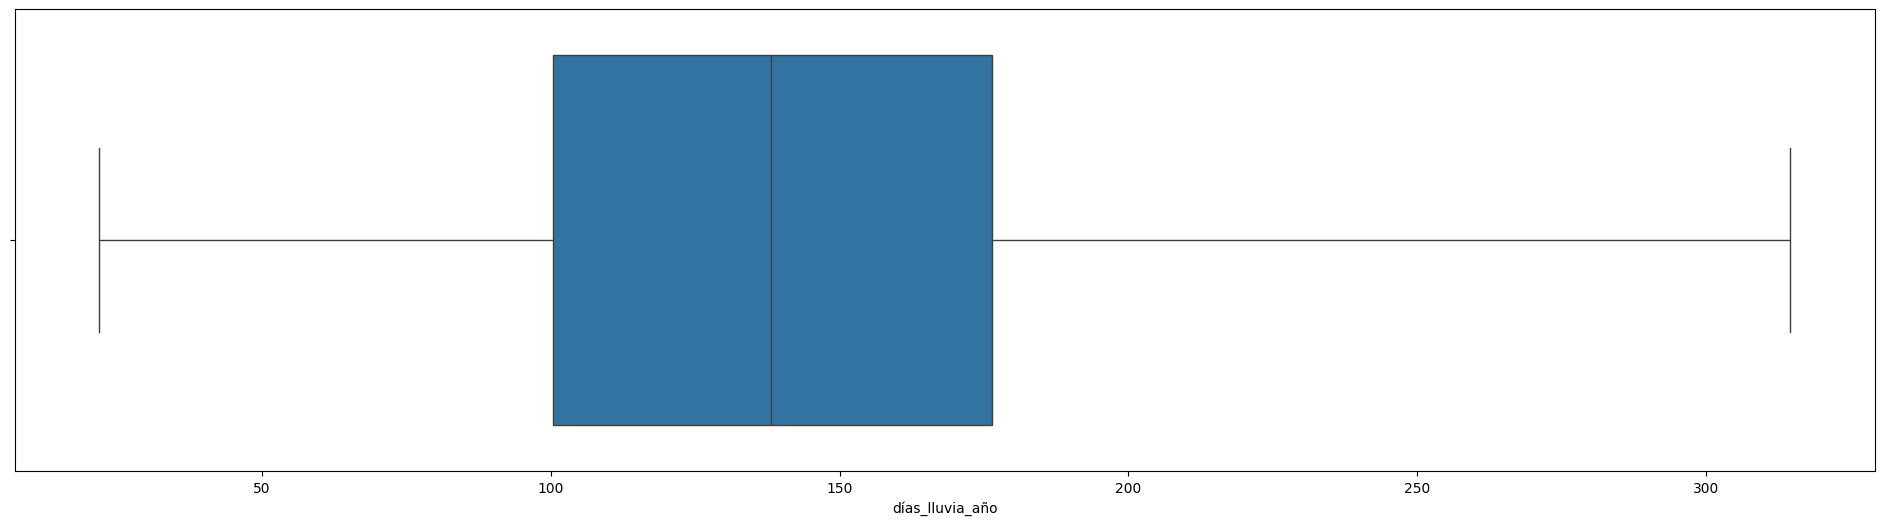

In [17]:
plt.figure(figsize=(24, 6))
# Remove the 'kind' argument, as it's not needed for sns.boxplot
sns.boxplot(x=d_ndll_min['días_lluvia_año'], whis=3)

## DataSet 5 | Velocidad Viento

In [18]:
d_vnt_ = client.get("sgfv-3yp8", limit=7000)
d_vnt = pd.DataFrame.from_records(d_vnt_)
d_vnt = d_vnt.rename(columns={"municipio": "municipio"})
d_vnt

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida
0,0051025060,0103,2017-02-23T17:00:00.000,0.2,BIOTOPO - AUT,NARIÑO,BARBACOAS,MIRA,1.408638889,-78.28161111,Velocidad Viento (10 min),m/s
1,0028045501,0103,2019-05-30T08:40:00.000,1.046815,PUEBLO BELLO - AUT,CESAR,PUEBLO BELLO,CESAR,10.42166667,-73.57471944,Velocidad Viento (10 min),m/s
2,0016015110,0103,2015-07-24T08:50:00.000,2.6,UNIVERSIDAD FRANCISO DE PAULA SANTANDER - AUT,NORTE DE SANTANDER,CÚCUTA,CATATUMBO,7.898777778,-72.48716667,Velocidad Viento (10 min),m/s
3,0021015040,0103,2010-09-02T22:20:00.000,1.7,LA PRIMAVERA - AUT,HUILA,SALADOBLANCO,ALTO MAGDALENA,2.021583333,-76.11433333,Velocidad Viento (10 min),m/s
4,0023035030,0103,2015-11-06T11:20:00.000,2.5,BASE PALANQUERO - AUT,CUNDINAMARCA,PUERTO SALGAR,MEDIO MAGDALENA,5.492861111,-74.658,Velocidad Viento (10 min),m/s
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0026155220,0103,2005-06-29T09:40:00.000,0.9,VILLAMARIA - AUT,CALDAS,VILLAMARIA,CAUCA,5.048666667,-75.51388889,Velocidad Viento (10 min),m/s
6996,0026125502,0103,2016-08-12T23:40:00.000,1.2,CAICEDONIA - AUT,VALLE DEL CAUCA,CAICEDONIA,CAUCA,4.297558333,-75.86396111,Velocidad Viento (10 min),m/s
6997,0026135320,0103,2018-05-31T01:50:00.000,6.5,NEVADO SANTA ISABEL - AUT,CALDAS,VILLAMARIA,CAUCA,4.802611111,-75.38047222,Velocidad Viento (10 min),m/s
6998,0027015280,0103,2015-07-27T15:30:00.000,6.6,PARAMO BELMIRA - AUT,ANTIOQUIA,ENTRERRIOS,NECHÍ,6.632027778,-75.64444444,Velocidad Viento (10 min),m/s


In [19]:
# seleccionna las columnas que necesitamos
d_vnt_min = d_vnt[['departamento', 'municipio', 'valorobservado', 'latitud', 'longitud']]
d_vnt_min = d_vnt_min.rename(columns={"valorobservado": "velocidad_v_m/s"})
#d_vnt_min = d_vnt_min.rename(columns={"municipio": "municipio"})
d_vnt_min

,departamento,municipio,velocidad_v_m/s,latitud,longitud
0,NARIÑO,BARBACOAS,0.2,1.408638889,-78.28161111
1,CESAR,PUEBLO BELLO,1.046815,10.42166667,-73.57471944
2,NORTE DE SANTANDER,CÚCUTA,2.6,7.898777778,-72.48716667
3,HUILA,SALADOBLANCO,1.7,2.021583333,-76.11433333
4,CUNDINAMARCA,PUERTO SALGAR,2.5,5.492861111,-74.658
...,...,...,...,...,...
6995,CALDAS,VILLAMARIA,0.9,5.048666667,-75.51388889
6996,VALLE DEL CAUCA,CAICEDONIA,1.2,4.297558333,-75.86396111
6997,CALDAS,VILLAMARIA,6.5,4.802611111,-75.38047222
6998,ANTIOQUIA,ENTRERRIOS,6.6,6.632027778,-75.64444444


In [20]:
#pasar a float
d_vnt_min['velocidad_v_m/s'] = pd.to_numeric(d_vnt_min ['velocidad_v_m/s'], errors='coerce')
d_vnt_min['latitud'] = pd.to_numeric(d_vnt_min ['latitud'], errors='coerce')
d_vnt_min['longitud'] = pd.to_numeric(d_vnt_min ['longitud'], errors='coerce')

In [21]:
#Borrar tildes
d_vnt_min['departamento'] = d_vnt_min['departamento'].str.replace(u"é", "e")
d_vnt_min['departamento'] = d_vnt_min['departamento'].str.replace(u"í", "i")
d_vnt_min['departamento'] = d_vnt_min['departamento'].str.replace(u"ó", "o")
d_vnt_min['departamento'] = d_vnt_min['departamento'].str.replace(u"ú", "u")
d_vnt_min['departamento'] = d_vnt_min['departamento'].str.replace(u"á", "a")
d_vnt_min['departamento'] = d_vnt_min['departamento'].str.replace(u"Á", "A")
d_vnt_min['departamento'] = d_vnt_min['departamento'].str.replace(u"É", "E")
d_vnt_min['departamento'] = d_vnt_min['departamento'].str.replace(u"Í", "I")
d_vnt_min['departamento'] = d_vnt_min['departamento'].str.replace(u"Ó", "O")
d_vnt_min['departamento'] = d_vnt_min['departamento'].str.replace(u"Ú", "U")    


In [22]:
# Agrupar por 'deparatamento' y calcular la media de 'velocidad_v_m/s' para cada uno
# Calcular la media de 'velocidad_v_m/s' por 'departamento' y agregarla como nueva columna
d_vnt_min['mediaxdeparatamento'] = d_vnt_min.groupby('departamento')['velocidad_v_m/s'].transform('mean')
d_vnt_min

,departamento,municipio,velocidad_v_m/s,latitud,longitud,mediaxdeparatamento
0,NARIÑO,BARBACOAS,0.200000,1.408639,-78.281611,2.625820
1,CESAR,PUEBLO BELLO,1.046815,10.421667,-73.574719,2.231150
2,NORTE DE SANTANDER,CÚCUTA,2.600000,7.898778,-72.487167,1.621193
3,HUILA,SALADOBLANCO,1.700000,2.021583,-76.114333,1.754059
4,CUNDINAMARCA,PUERTO SALGAR,2.500000,5.492861,-74.658000,2.049960
...,...,...,...,...,...,...
6995,CALDAS,VILLAMARIA,0.900000,5.048667,-75.513889,1.810312
6996,VALLE DEL CAUCA,CAICEDONIA,1.200000,4.297558,-75.863961,1.857103
6997,CALDAS,VILLAMARIA,6.500000,4.802611,-75.380472,1.810312
6998,ANTIOQUIA,ENTRERRIOS,6.600000,6.632028,-75.644444,1.748039


In [23]:
# Agrupar por 'municipio' y calcular la media de 'velocidad_v_m/s' para cada uno
d_vnt_min['mediaxmunicipio'] = d_vnt_min.groupby('municipio')['velocidad_v_m/s'].transform('mean')

d_vnt_min


,departamento,municipio,velocidad_v_m/s,latitud,longitud,mediaxdeparatamento,mediaxmunicipio
0,NARIÑO,BARBACOAS,0.200000,1.408639,-78.281611,2.625820,4.313333
1,CESAR,PUEBLO BELLO,1.046815,10.421667,-73.574719,2.231150,1.253742
2,NORTE DE SANTANDER,CÚCUTA,2.600000,7.898778,-72.487167,1.621193,2.104167
3,HUILA,SALADOBLANCO,1.700000,2.021583,-76.114333,1.754059,1.452941
4,CUNDINAMARCA,PUERTO SALGAR,2.500000,5.492861,-74.658000,2.049960,0.771111
...,...,...,...,...,...,...,...
6995,CALDAS,VILLAMARIA,0.900000,5.048667,-75.513889,1.810312,3.029907
6996,VALLE DEL CAUCA,CAICEDONIA,1.200000,4.297558,-75.863961,1.857103,0.798867
6997,CALDAS,VILLAMARIA,6.500000,4.802611,-75.380472,1.810312,3.029907
6998,ANTIOQUIA,ENTRERRIOS,6.600000,6.632028,-75.644444,1.748039,3.703226


<Axes: xlabel='velocidad_v_m/s'>

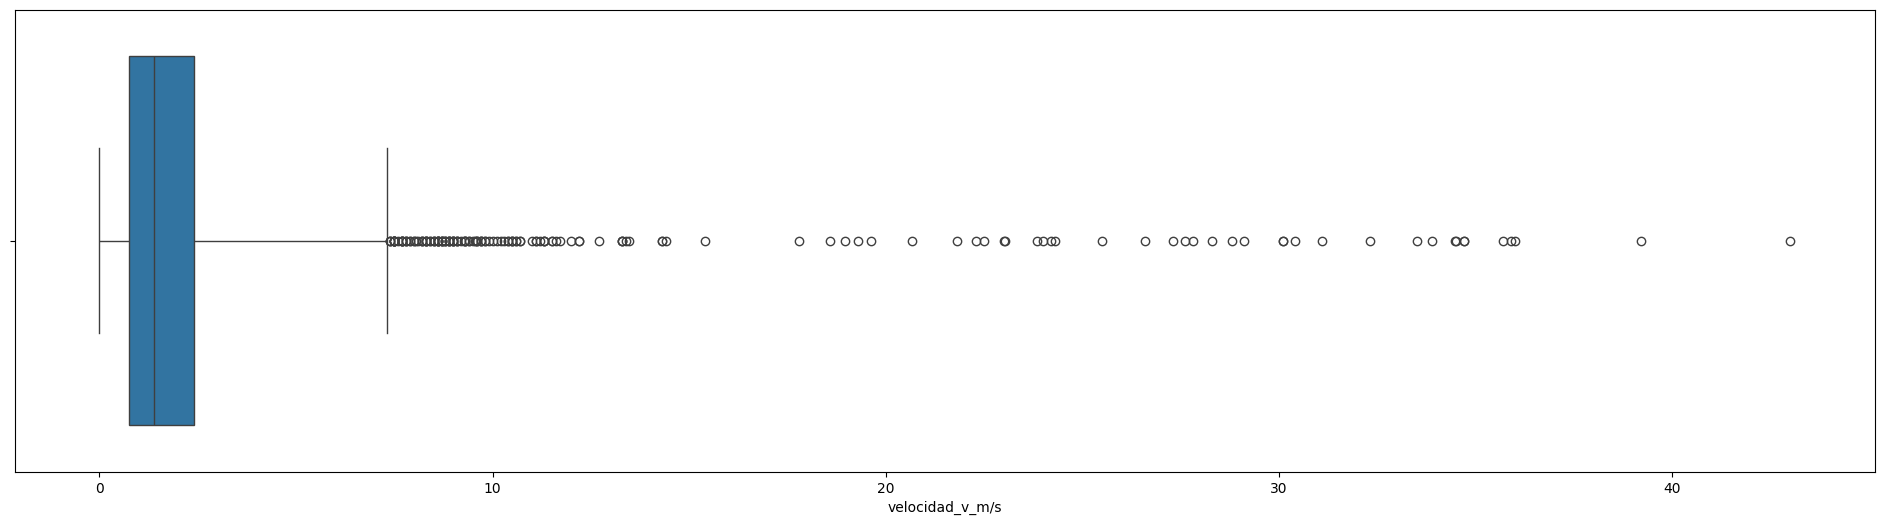

In [25]:
plt.figure(figsize=(24, 6))
sns.boxplot(x=d_vnt_min['velocidad_v_m/s'], whis=3)

## d_cpc - DataSet 6 | Centros poblados de Colombia

In [26]:
# d_cpc = pd.read_csv("https://raw.githubusercontent.com/gluoneros/talentoTech/refs/heads/main/DIVIPOLA_CentrosPoblados.csv", encoding="utf-8", delimiter=";",skiprows=2, header=None).iloc[:, 2:]
d_cpc = pd.read_csv("https://raw.githubusercontent.com/gluoneros/talentoTech/refs/heads/main/DIVIPOLA_CentrosPoblados.csv", encoding="utf-8", delimiter=";").iloc[:, 2:]

d_cpc

,Código.1,Nombre.1,Código.2,Nombre.2,Tipo,Longitud,Latitud
0,5001,MEDELLÍN,5001000,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",CM,"-75,578661","6,250063"
1,5001,MEDELLÍN,5001001,PALMITAS,CP,"-75,690039","6,343329"
2,5001,MEDELLÍN,5001004,SANTA ELENA,CP,"-75,501293","6,210599"
3,5001,MEDELLÍN,5001009,ALTAVISTA,CP,"-75,644721","6,220472"
4,5001,MEDELLÍN,5001010,AGUAS FRÍAS,CP,"-75,635261","6,232665"
...,...,...,...,...,...,...,...
8156,99773,CUMARIBO,99773028,GUACO BAJO,CP,NaN,NaN
8157,99773,CUMARIBO,99773029,GUACO ALTO,CP,NaN,NaN
8158,99773,CUMARIBO,99773030,CAÑO BOCÓN,CP,NaN,NaN
8159,99773,CUMARIBO,99773031,CAMUNIANAE,CP,NaN,NaN


In [27]:
# cambiar el nombre de las columnas para que coincidan con el nombre de las variables en el notebook
d_cpc = d_cpc.rename(columns={"Nombre.1": "municipio"})
d_cpc = d_cpc.rename(columns={"Nombre.2": "poblacion"})
d_cpc = d_cpc.rename(columns={"Longitud": "longitud"})
d_cpc = d_cpc.rename(columns={"Latitud": "latitud"})

In [28]:
# seleccionar columnas de interes
d_cpc_min = d_cpc[['municipio', 'poblacion', 'longitud', 'latitud']]
d_cpc_min

,municipio,poblacion,longitud,latitud
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...","-75,578661","6,250063"
1,MEDELLÍN,PALMITAS,"-75,690039","6,343329"
2,MEDELLÍN,SANTA ELENA,"-75,501293","6,210599"
3,MEDELLÍN,ALTAVISTA,"-75,644721","6,220472"
4,MEDELLÍN,AGUAS FRÍAS,"-75,635261","6,232665"
...,...,...,...,...
8156,CUMARIBO,GUACO BAJO,NaN,NaN
8157,CUMARIBO,GUACO ALTO,NaN,NaN
8158,CUMARIBO,CAÑO BOCÓN,NaN,NaN
8159,CUMARIBO,CAMUNIANAE,NaN,NaN


In [29]:
d_cpc_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   municipio  8161 non-null   object
 1   poblacion  8161 non-null   object
 2   longitud   7728 non-null   object
 3   latitud    7728 non-null   object
dtypes: object(4)
memory usage: 255.2+ KB


In [30]:
# Cambia comas por puntos en el campo 'dias_lluvia'
d_cpc_min['latitud'] = d_cpc_min['latitud'].str.replace(',', '.', regex=False)
d_cpc_min['longitud'] = d_cpc_min['longitud'].str.replace(',', '.', regex=False)

/tmp/ipykernel_12969/1169610433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cpc_min['latitud'] = d_cpc_min['latitud'].str.replace(',', '.', regex=False)
/tmp/ipykernel_12969/1169610433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cpc_min['longitud'] = d_cpc_min['longitud'].str.replace(',', '.', regex=False)


In [31]:
d_cpc_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   municipio  8161 non-null   object
 1   poblacion  8161 non-null   object
 2   longitud   7728 non-null   object
 3   latitud    7728 non-null   object
dtypes: object(4)
memory usage: 255.2+ KB


In [32]:
#Eliminar filas con NA
d_cpc_min.dropna(inplace=True)
d_cpc_min

/tmp/ipykernel_12969/1180263269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cpc_min.dropna(inplace=True)


,municipio,poblacion,longitud,latitud
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063
1,MEDELLÍN,PALMITAS,-75.690039,6.343329
2,MEDELLÍN,SANTA ELENA,-75.501293,6.210599
3,MEDELLÍN,ALTAVISTA,-75.644721,6.220472
4,MEDELLÍN,AGUAS FRÍAS,-75.635261,6.232665
...,...,...,...,...
8151,CUMARIBO,EL TUPARRO,-69.062984,4.887093
8152,CUMARIBO,BRISA,-69.773596,4.343518
8153,CUMARIBO,GUATURIBA,-69.854645,4.34513
8154,CUMARIBO,MATSULDANI,-69.797888,4.342496


In [33]:
# pasar a numerico
d_cpc_min['latitud'] = pd.to_numeric(d_cpc_min['latitud'], errors='coerce')
d_cpc_min['longitud'] = pd.to_numeric(d_cpc_min['longitud'], errors='coerce')
d_cpc_min

/tmp/ipykernel_12969/4085144221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cpc_min['latitud'] = pd.to_numeric(d_cpc_min['latitud'], errors='coerce')
/tmp/ipykernel_12969/4085144221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cpc_min['longitud'] = pd.to_numeric(d_cpc_min['longitud'], errors='coerce')


,municipio,poblacion,longitud,latitud
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063
1,MEDELLÍN,PALMITAS,-75.690039,6.343329
2,MEDELLÍN,SANTA ELENA,-75.501293,6.210599
3,MEDELLÍN,ALTAVISTA,-75.644721,6.220472
4,MEDELLÍN,AGUAS FRÍAS,-75.635261,6.232665
...,...,...,...,...
8151,CUMARIBO,EL TUPARRO,-69.062984,4.887093
8152,CUMARIBO,BRISA,-69.773596,4.343518
8153,CUMARIBO,GUATURIBA,-69.854645,4.345130
8154,CUMARIBO,MATSULDANI,-69.797888,4.342496


In [34]:
d_cpc_min.isna().sum()

municipio    0
poblacion    0
longitud     0
latitud      0
dtype: int64

In [35]:
# merge dataframes lluvia y viento
df_main = pd.merge(left=d_cpc_min, right=d_vnt_min, left_on='municipio', right_on='municipio', how='left')
df_main

,municipio,poblacion,longitud_x,latitud_x,departamento,velocidad_v_m/s,latitud_y,longitud_y,mediaxdeparatamento,mediaxmunicipio
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.5,6.286333,-75.612792,1.748039,2.082
1,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,2.3,6.286333,-75.612792,1.748039,2.082
2,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,2.0,6.221000,-75.589000,1.748039,2.082
3,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.7,6.253000,-75.550000,1.748039,2.082
4,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.5,6.286333,-75.612792,1.748039,2.082
...,...,...,...,...,...,...,...,...,...,...
79530,CUMARIBO,EL TUPARRO,-69.062984,4.887093,NaN,NaN,NaN,NaN,NaN,NaN
79531,CUMARIBO,BRISA,-69.773596,4.343518,NaN,NaN,NaN,NaN,NaN,NaN
79532,CUMARIBO,GUATURIBA,-69.854645,4.345130,NaN,NaN,NaN,NaN,NaN,NaN
79533,CUMARIBO,MATSULDANI,-69.797888,4.342496,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df_main.isnull().sum()

municipio                 0
poblacion                 0
longitud_x                0
latitud_x                 0
departamento           4890
velocidad_v_m/s        4890
latitud_y              4890
longitud_y             4890
mediaxdeparatamento    4890
mediaxmunicipio        4890
dtype: int64

In [37]:
# Calcular la media por municipio
municipio_means = df_main.groupby('municipio')['velocidad_v_m/s'].mean()

<Axes: xlabel='velocidad_v_m/s'>

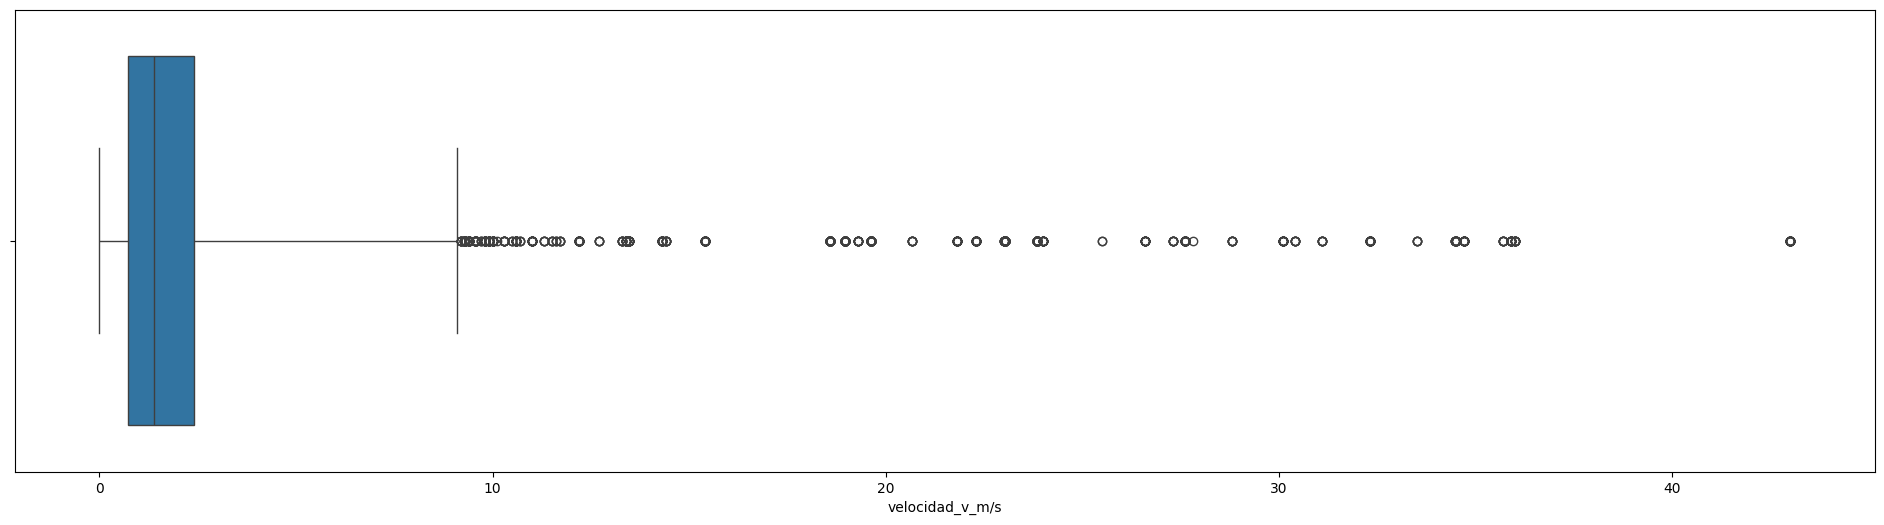

In [38]:
plt.figure(figsize=(24, 6))
# Remove the 'kind' argument, as it's not needed for sns.boxplot
sns.boxplot(x=df_main['velocidad_v_m/s'], whis=4)

In [39]:
# Rellenar los valores nulos usando la media por municipio
df_main['velocidad_v_m/s'] = df_main.apply(
    lambda row: municipio_means[row['municipio']] if pd.isnull(row['velocidad_v_m/s']) else row['velocidad_v_m/s'],
    axis=1
)
df_main


,municipio,poblacion,longitud_x,latitud_x,departamento,velocidad_v_m/s,latitud_y,longitud_y,mediaxdeparatamento,mediaxmunicipio
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.5,6.286333,-75.612792,1.748039,2.082
1,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,2.3,6.286333,-75.612792,1.748039,2.082
2,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,2.0,6.221000,-75.589000,1.748039,2.082
3,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.7,6.253000,-75.550000,1.748039,2.082
4,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.5,6.286333,-75.612792,1.748039,2.082
...,...,...,...,...,...,...,...,...,...,...
79530,CUMARIBO,EL TUPARRO,-69.062984,4.887093,NaN,NaN,NaN,NaN,NaN,NaN
79531,CUMARIBO,BRISA,-69.773596,4.343518,NaN,NaN,NaN,NaN,NaN,NaN
79532,CUMARIBO,GUATURIBA,-69.854645,4.345130,NaN,NaN,NaN,NaN,NaN,NaN
79533,CUMARIBO,MATSULDANI,-69.797888,4.342496,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_main.isnull().sum()

municipio                 0
poblacion                 0
longitud_x                0
latitud_x                 0
departamento           4890
velocidad_v_m/s        4890
latitud_y              4890
longitud_y             4890
mediaxdeparatamento    4890
mediaxmunicipio        4890
dtype: int64

In [41]:
# Rellenar los valores NaN en 'velocidad_v_m/s' con la media por departamento
df_main['velocidad_v_m/s'].fillna(df_main['mediaxdeparatamento'], inplace=True)
df_main


/tmp/ipykernel_12969/1825517107.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_main['velocidad_v_m/s'].fillna(df_main['mediaxdeparatamento'], inplace=True)


,municipio,poblacion,longitud_x,latitud_x,departamento,velocidad_v_m/s,latitud_y,longitud_y,mediaxdeparatamento,mediaxmunicipio
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.5,6.286333,-75.612792,1.748039,2.082
1,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,2.3,6.286333,-75.612792,1.748039,2.082
2,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,2.0,6.221000,-75.589000,1.748039,2.082
3,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.7,6.253000,-75.550000,1.748039,2.082
4,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.5,6.286333,-75.612792,1.748039,2.082
...,...,...,...,...,...,...,...,...,...,...
79530,CUMARIBO,EL TUPARRO,-69.062984,4.887093,NaN,NaN,NaN,NaN,NaN,NaN
79531,CUMARIBO,BRISA,-69.773596,4.343518,NaN,NaN,NaN,NaN,NaN,NaN
79532,CUMARIBO,GUATURIBA,-69.854645,4.345130,NaN,NaN,NaN,NaN,NaN,NaN
79533,CUMARIBO,MATSULDANI,-69.797888,4.342496,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_main.isnull().sum()

municipio                 0
poblacion                 0
longitud_x                0
latitud_x                 0
departamento           4890
velocidad_v_m/s        4890
latitud_y              4890
longitud_y             4890
mediaxdeparatamento    4890
mediaxmunicipio        4890
dtype: int64

In [43]:
# Rellenar los valores nulos de la tabla de datos
df_main.fillna(df_main['velocidad_v_m/s'].mean(), inplace=True)

In [44]:
df_main.isnull().sum()

municipio              0
poblacion              0
longitud_x             0
latitud_x              0
departamento           0
velocidad_v_m/s        0
latitud_y              0
longitud_y             0
mediaxdeparatamento    0
mediaxmunicipio        0
dtype: int64

<Axes: xlabel='velocidad_v_m/s'>

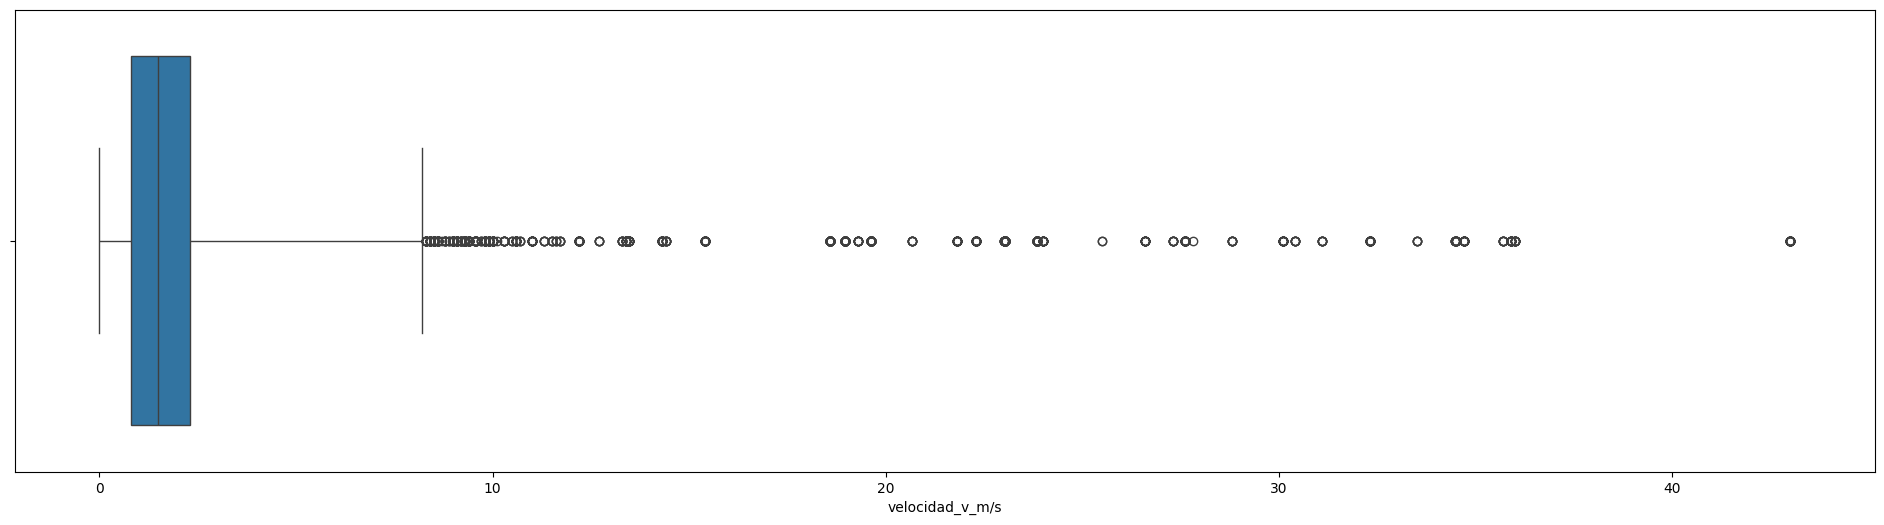

In [45]:
plt.figure(figsize=(24, 6))
# Remove the 'kind' argument, as it's not needed for sns.boxplot
sns.boxplot(x=df_main['velocidad_v_m/s'], whis=4)

## Viabilidad de proyecto eólico 0 solar

In [83]:
# Merge de los datasets de viento dias lluvia y centros poblados
df_viabilidad = pd.merge(left=df_main, right=d_ndll_min, left_on='municipio', right_on='municipio', how='left')
df_viabilidad

,municipio,poblacion,longitud_x,latitud_x,departamento_x,velocidad_v_m/s,latitud_y,longitud_y,mediaxdeparatamento,mediaxmunicipio,días_lluvia_año,departamento_y,latitud,longitud,altitud_m
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.500000,6.286333,-75.612792,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0
1,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,2.300000,6.286333,-75.612792,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0
2,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,2.000000,6.221000,-75.589000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0
3,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.700000,6.253000,-75.550000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0
4,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.500000,6.286333,-75.612792,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79530,CUMARIBO,EL TUPARRO,-69.062984,4.887093,2.047625,2.047625,2.047625,2.047625,2.047625,2.047625,155.516667,Vichada,3.99,-68.32,94.0
79531,CUMARIBO,BRISA,-69.773596,4.343518,2.047625,2.047625,2.047625,2.047625,2.047625,2.047625,155.516667,Vichada,3.99,-68.32,94.0
79532,CUMARIBO,GUATURIBA,-69.854645,4.345130,2.047625,2.047625,2.047625,2.047625,2.047625,2.047625,155.516667,Vichada,3.99,-68.32,94.0
79533,CUMARIBO,MATSULDANI,-69.797888,4.342496,2.047625,2.047625,2.047625,2.047625,2.047625,2.047625,155.516667,Vichada,3.99,-68.32,94.0


In [84]:
df_viabilidad.isnull().sum()

municipio                  0
poblacion                  0
longitud_x                 0
latitud_x                  0
departamento_x             0
velocidad_v_m/s            0
latitud_y                  0
longitud_y                 0
mediaxdeparatamento        0
mediaxmunicipio            0
días_lluvia_año        17408
departamento_y         17408
latitud                17408
longitud               17408
altitud_m              17408
dtype: int64

In [85]:
# borrar columnas que no necesitamos
df_viabilidad = df_viabilidad.drop(columns=['longitud_y'])
df_viabilidad = df_viabilidad.drop(columns=['latitud_y'])
df_viabilidad

,municipio,poblacion,longitud_x,latitud_x,departamento_x,velocidad_v_m/s,mediaxdeparatamento,mediaxmunicipio,días_lluvia_año,departamento_y,latitud,longitud,altitud_m
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.500000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0
1,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,2.300000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0
2,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,2.000000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0
3,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.700000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0
4,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.500000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79530,CUMARIBO,EL TUPARRO,-69.062984,4.887093,2.047625,2.047625,2.047625,2.047625,155.516667,Vichada,3.99,-68.32,94.0
79531,CUMARIBO,BRISA,-69.773596,4.343518,2.047625,2.047625,2.047625,2.047625,155.516667,Vichada,3.99,-68.32,94.0
79532,CUMARIBO,GUATURIBA,-69.854645,4.345130,2.047625,2.047625,2.047625,2.047625,155.516667,Vichada,3.99,-68.32,94.0
79533,CUMARIBO,MATSULDANI,-69.797888,4.342496,2.047625,2.047625,2.047625,2.047625,155.516667,Vichada,3.99,-68.32,94.0


In [86]:
df_viabilidad.isnull().sum()

municipio                  0
poblacion                  0
longitud_x                 0
latitud_x                  0
departamento_x             0
velocidad_v_m/s            0
mediaxdeparatamento        0
mediaxmunicipio            0
días_lluvia_año        17408
departamento_y         17408
latitud                17408
longitud               17408
altitud_m              17408
dtype: int64

<Axes: xlabel='velocidad_v_m/s'>

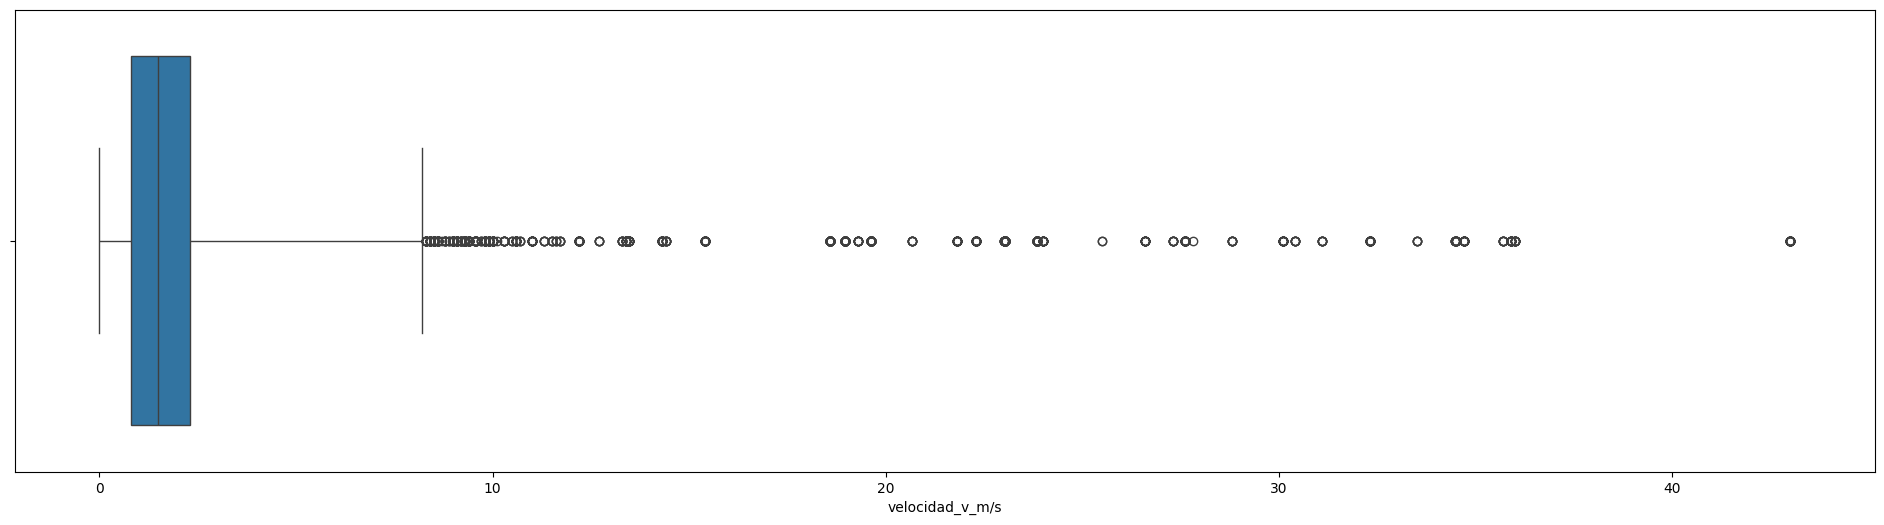

In [87]:
plt.figure(figsize=(24, 6))
# Remove the 'kind' argument, as it's not needed for sns.boxplot
sns.boxplot(x=df_viabilidad['velocidad_v_m/s'], whis=4)

In [88]:
# Remplazar los valores nulos con la media de días de lluvia por año
df_viabilidad.fillna(df_viabilidad['días_lluvia_año'].mean(), inplace=True)

In [89]:
#imputar valores nulos con la mediana de la columna altitud_m
df_viabilidad.fillna(df_viabilidad['altitud_m'].mean(), inplace=True)
df_viabilidad

,municipio,poblacion,longitud_x,latitud_x,departamento_x,velocidad_v_m/s,mediaxdeparatamento,mediaxmunicipio,días_lluvia_año,departamento_y,latitud,longitud,altitud_m
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.500000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0
1,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,2.300000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0
2,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,2.000000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0
3,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.700000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0
4,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.500000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79530,CUMARIBO,EL TUPARRO,-69.062984,4.887093,2.047625,2.047625,2.047625,2.047625,155.516667,Vichada,3.99,-68.32,94.0
79531,CUMARIBO,BRISA,-69.773596,4.343518,2.047625,2.047625,2.047625,2.047625,155.516667,Vichada,3.99,-68.32,94.0
79532,CUMARIBO,GUATURIBA,-69.854645,4.345130,2.047625,2.047625,2.047625,2.047625,155.516667,Vichada,3.99,-68.32,94.0
79533,CUMARIBO,MATSULDANI,-69.797888,4.342496,2.047625,2.047625,2.047625,2.047625,155.516667,Vichada,3.99,-68.32,94.0


In [90]:
df_viabilidad.isnull().sum()

municipio              0
poblacion              0
longitud_x             0
latitud_x              0
departamento_x         0
velocidad_v_m/s        0
mediaxdeparatamento    0
mediaxmunicipio        0
días_lluvia_año        0
departamento_y         0
latitud                0
longitud               0
altitud_m              0
dtype: int64

In [91]:
df_viabilidad

,municipio,poblacion,longitud_x,latitud_x,departamento_x,velocidad_v_m/s,mediaxdeparatamento,mediaxmunicipio,días_lluvia_año,departamento_y,latitud,longitud,altitud_m
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.500000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0
1,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,2.300000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0
2,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,2.000000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0
3,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.700000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0
4,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.500000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79530,CUMARIBO,EL TUPARRO,-69.062984,4.887093,2.047625,2.047625,2.047625,2.047625,155.516667,Vichada,3.99,-68.32,94.0
79531,CUMARIBO,BRISA,-69.773596,4.343518,2.047625,2.047625,2.047625,2.047625,155.516667,Vichada,3.99,-68.32,94.0
79532,CUMARIBO,GUATURIBA,-69.854645,4.345130,2.047625,2.047625,2.047625,2.047625,155.516667,Vichada,3.99,-68.32,94.0
79533,CUMARIBO,MATSULDANI,-69.797888,4.342496,2.047625,2.047625,2.047625,2.047625,155.516667,Vichada,3.99,-68.32,94.0


In [93]:
# Definición variable objetivo: 'proyecto_energia', con los cuatro casos posibles (0, 1, 2, 3)
def definir_proyecto(row):
    es_apto_solar = row['días_lluvia_año'] < 150
    es_apto_eolico = row['velocidad_v_m/s'] > 3.5

    # Determinar el valor de 'proyecto_energia' basado en las condiciones
    if es_apto_solar and es_apto_eolico:
        return 3  # Apto para ambos proyectos (solar y eólico)
    elif es_apto_solar:
        return 1  # Solo apto para proyecto solar
    elif es_apto_eolico:
        return 2  # Solo apto para proyecto eólico
    else:
        return 0  # No apto para ningún proyecto

# Aplicar la función a cada fila del DataFrame
df_viabilidad['proyecto_energia'] = df_viabilidad.apply(definir_proyecto, axis=1)
df_viabilidad

,municipio,poblacion,longitud_x,latitud_x,departamento_x,velocidad_v_m/s,mediaxdeparatamento,mediaxmunicipio,días_lluvia_año,departamento_y,latitud,longitud,altitud_m,proyecto_energia
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.500000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0,0
1,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,2.300000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0,0
2,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,2.000000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0,0
3,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.700000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0,0
4,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.500000,1.748039,2.082000,180.460000,Antioquia,6.26,-75.68,2450.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79530,CUMARIBO,EL TUPARRO,-69.062984,4.887093,2.047625,2.047625,2.047625,2.047625,155.516667,Vichada,3.99,-68.32,94.0,0
79531,CUMARIBO,BRISA,-69.773596,4.343518,2.047625,2.047625,2.047625,2.047625,155.516667,Vichada,3.99,-68.32,94.0,0
79532,CUMARIBO,GUATURIBA,-69.854645,4.345130,2.047625,2.047625,2.047625,2.047625,155.516667,Vichada,3.99,-68.32,94.0,0
79533,CUMARIBO,MATSULDANI,-69.797888,4.342496,2.047625,2.047625,2.047625,2.047625,155.516667,Vichada,3.99,-68.32,94.0,0


In [94]:
df_viabilidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79535 entries, 0 to 79534
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   municipio            79535 non-null  object 
 1   poblacion            79535 non-null  object 
 2   longitud_x           79535 non-null  float64
 3   latitud_x            79535 non-null  float64
 4   departamento_x       79535 non-null  object 
 5   velocidad_v_m/s      79535 non-null  float64
 6   mediaxdeparatamento  79535 non-null  float64
 7   mediaxmunicipio      79535 non-null  float64
 8   días_lluvia_año      79535 non-null  float64
 9   departamento_y       79535 non-null  object 
 10  latitud              79535 non-null  float64
 11  longitud             79535 non-null  float64
 12  altitud_m            79535 non-null  float64
 13  proyecto_energia     79535 non-null  int64  
dtypes: float64(9), int64(1), object(4)
memory usage: 8.5+ MB


In [119]:
df_viabilidad[df_viabilidad['proyecto_energia'] == 1].describe()

,longitud_x,latitud_x,velocidad_v_m/s,mediaxdeparatamento,mediaxmunicipio,días_lluvia_año,latitud,longitud,altitud_m,proyecto_energia
count,44816.000000,44816.000000,44816.000000,44816.000000,44816.000000,44816.000000,44816.000000,44816.000000,44816.000000,44816.0
mean,-75.049106,6.391456,1.448252,2.009534,1.813273,116.085024,55.956592,3.962536,396.895402,1.0
std,1.416336,2.839386,0.863049,0.753860,1.035087,33.038796,64.043190,103.549094,620.998227,0.0
min,-81.730001,-0.888833,0.000000,0.415000,0.300190,21.846667,0.820000,-77.680000,1.000000,1.0
25%,-75.907813,4.360782,0.700000,1.748039,1.227083,87.150000,6.600000,-75.160000,58.000000,1.0
50%,-75.286984,5.966462,1.400000,1.857103,1.598007,140.120172,10.040000,-73.600000,140.120172,1.0
75%,-73.981773,8.730259,2.047625,2.144628,2.047625,140.120172,140.120172,140.120172,432.000000,1.0
max,-66.963692,13.383969,3.500000,7.624048,7.624048,149.925000,140.120172,140.120172,3250.000000,1.0


In [120]:
df_viabilidad[df_viabilidad['proyecto_energia'] == 2].describe()

,longitud_x,latitud_x,velocidad_v_m/s,mediaxdeparatamento,mediaxmunicipio,días_lluvia_año,latitud,longitud,altitud_m,proyecto_energia
count,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.0
mean,-76.096349,4.151116,7.136208,1.937353,3.459666,203.135637,4.213423,-76.074670,1212.922213,2.0
std,1.167182,1.546089,6.083945,0.391852,1.806875,42.943089,1.525662,1.126318,1013.469420,0.0
min,-78.226036,0.803648,3.544324,1.314827,1.036667,152.300000,0.800000,-78.140000,10.000000,2.0
25%,-77.132336,3.331147,3.900000,1.748039,1.937879,169.600000,3.820000,-76.990000,28.000000,2.0
50%,-75.832781,4.093360,4.700000,1.857103,2.491176,181.050000,4.160000,-75.740000,1342.000000,2.0
75%,-75.602043,4.862161,6.100000,2.049960,5.911111,254.400000,4.820000,-75.680000,1900.000000,2.0
max,-72.471892,7.666199,34.700000,3.013208,5.911111,314.600000,7.570000,-72.470000,3347.000000,2.0


In [121]:
df_viabilidad[df_viabilidad['proyecto_energia'] == 3].describe()

,longitud_x,latitud_x,velocidad_v_m/s,mediaxdeparatamento,mediaxmunicipio,días_lluvia_año,latitud,longitud,altitud_m,proyecto_energia
count,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.0
mean,-74.075945,8.331677,6.454432,2.972579,3.771783,93.875073,29.928426,-39.259085,416.058152,3.0
std,1.847249,3.540100,5.616212,1.494335,1.926842,45.278429,48.537572,78.847039,727.967004,0.0
min,-81.730001,0.812463,3.540823,1.198574,0.622783,21.846667,0.810000,-77.850000,3.000000,3.0
25%,-75.275544,4.778878,4.100000,1.764682,2.552174,41.875000,5.680000,-74.770000,10.000000,3.0
50%,-73.828866,10.078711,4.800000,2.231150,3.350877,115.233333,11.130000,-73.250000,138.000000,3.0
75%,-72.903838,11.249569,6.200000,4.881395,5.348352,140.120172,12.220000,-71.980000,439.000000,3.0
max,-70.441387,12.557312,43.000000,7.624048,20.800000,149.925000,140.120172,140.120172,3250.000000,3.0


In [96]:
filas_aprobadas = df_viabilidad[df_viabilidad['velocidad_v_m/s'] == 77.42]

# Imprimir las filas filtradas
print(filas_aprobadas)

Empty DataFrame
Columns: [municipio, poblacion, longitud_x, latitud_x, departamento_x, velocidad_v_m/s, mediaxdeparatamento, mediaxmunicipio, días_lluvia_año, departamento_y, latitud, longitud, altitud_m, proyecto_energia]
Index: []


In [99]:
# Definición de variables
# X = df_viabilidad[['velocidad_v_m/s', 'días_lluvia_año', 'altitud_m', 'latitud_x', 'longitud_x']]
X = df_viabilidad[['latitud_x', 'longitud_x']]
y = df_viabilidad['proyecto_energia']

In [100]:
# Dividir datos pruebas y entrenamiento
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [101]:
# Escalador
#scaler_x = RobustScaler()
#x_train_scl = scaler_x.fit_transform(x_train)
#x_test_scl = scaler_x.transform(x_test)

#scaler_y = RobustScaler()
#y_train_scl = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
#y_test_scl = scaler_y.transform(y_test.values.reshape(-1, 1))

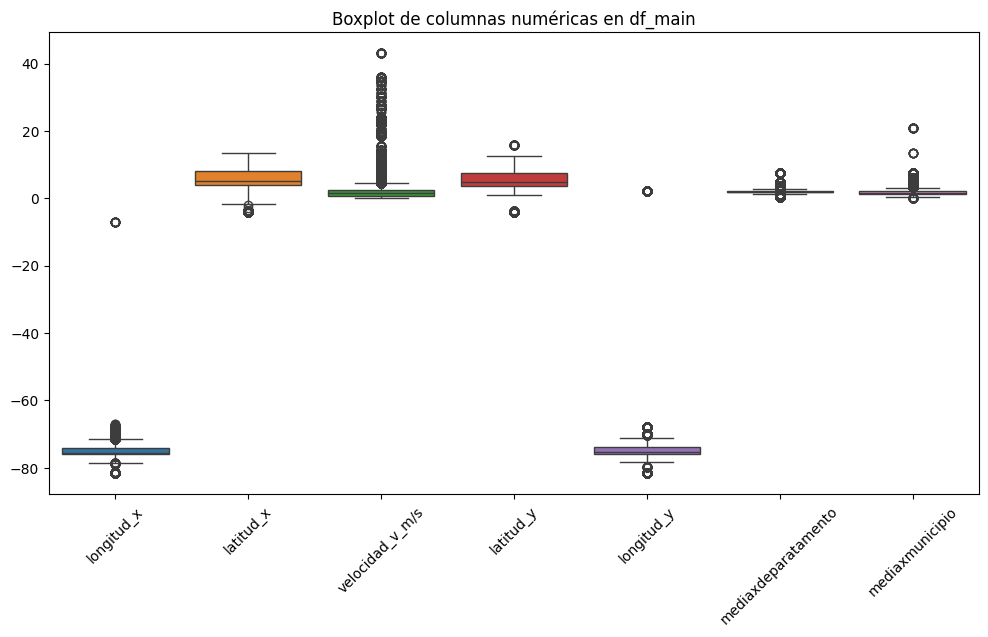

In [102]:
numeric_columns = df_main.select_dtypes(include='number')

# Crear el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_columns)
plt.xticks(rotation=45)
plt.title("Boxplot de columnas numéricas en df_main")
plt.show()


<Axes: xlabel='velocidad_v_m/s'>

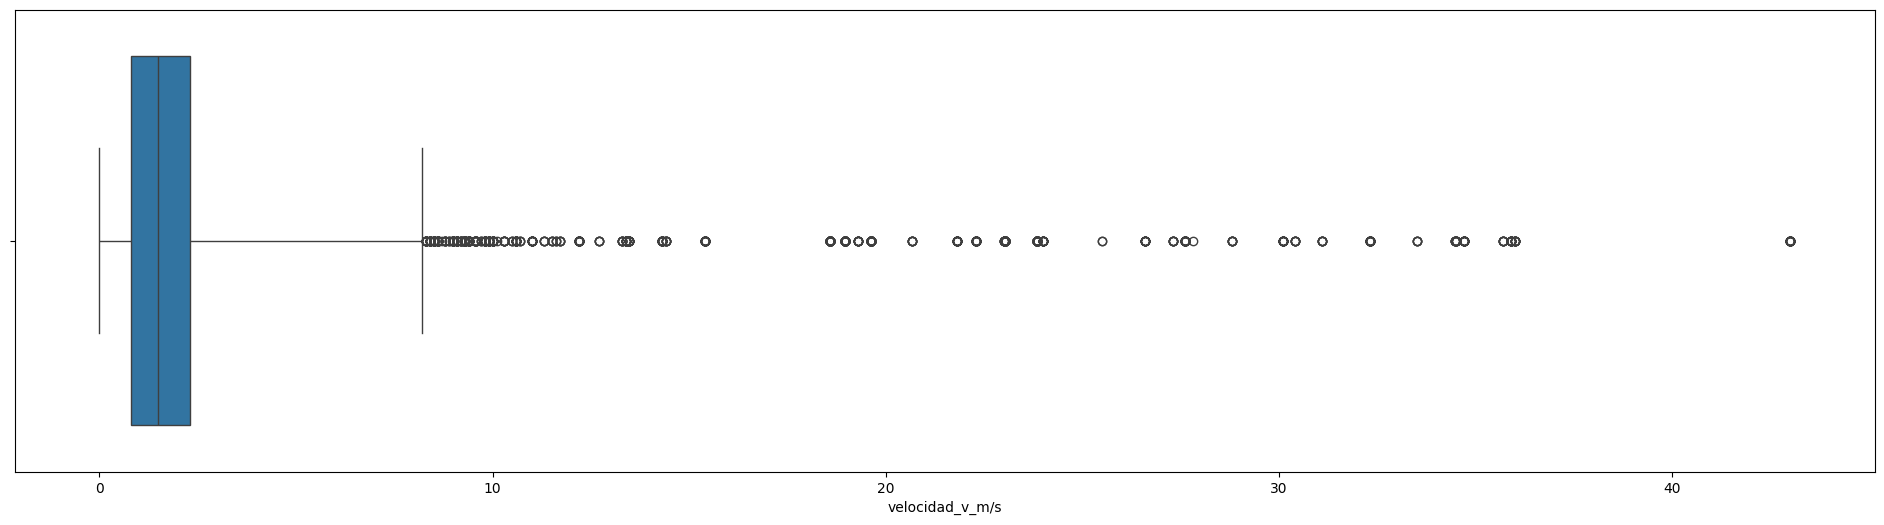

In [103]:
plt.figure(figsize=(24, 6))
sns.boxplot(x=df_viabilidad['velocidad_v_m/s'], whis=4)

<Axes: xlabel='días_lluvia_año'>

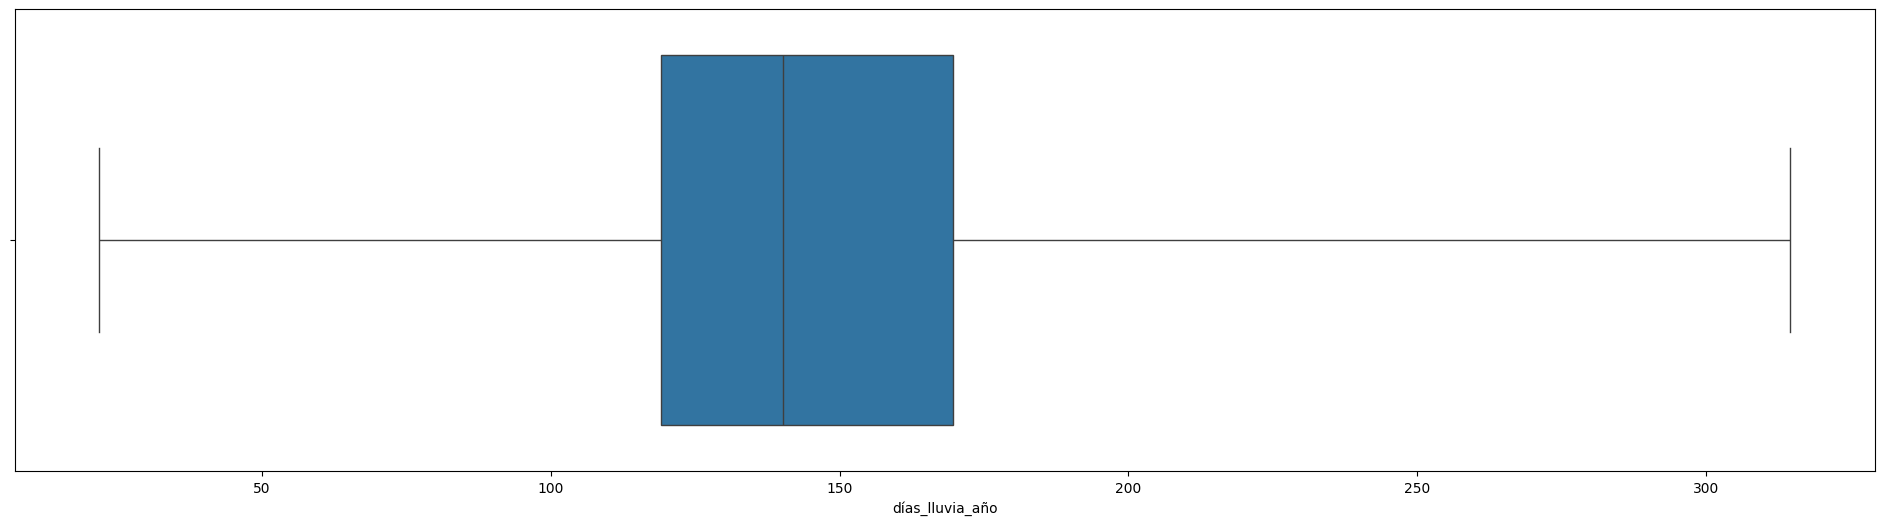

In [104]:
plt.figure(figsize=(24, 6))
sns.boxplot(x=df_viabilidad['días_lluvia_año'], whis=4)

## Modelo regresion logistica

In [105]:
# Entrenamiento del Modelo
modelo_logistico = LogisticRegression()
modelo_logistico.fit(x_train, y_train)

/home/usuario/proyectos/renovaPred/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
y_predict_logistic = modelo_logistico.predict(x_test)

In [107]:
# Evaluación del Modelo
accuracy = accuracy_score(y_test, y_predict_logistic)
confusion = confusion_matrix(y_test, y_predict_logistic)
classification_rep = classification_report(y_test, y_predict_logistic)

print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.30      0.35      7535
           1       0.59      0.82      0.69     13384
           2       0.00      0.00      0.00      1075
           3       0.00      0.00      0.00      1867

    accuracy                           0.55     23861
   macro avg       0.25      0.28      0.26     23861
weighted avg       0.46      0.55      0.49     23861



/home/usuario/proyectos/renovaPred/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/usuario/proyectos/renovaPred/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/usuario/proyectos/renovaPred/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [108]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.5518209630778257
Confusion Matrix:
[[ 2250  5280     0     5]
 [ 2467 10917     0     0]
 [  507   568     0     0]
 [  274  1593     0     0]]


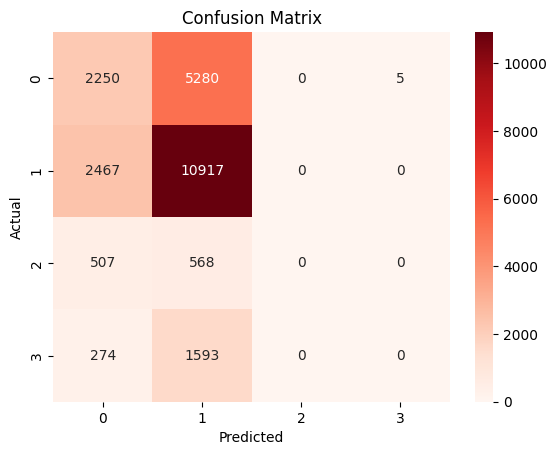

In [109]:
sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [110]:
#No es muy bueno el modelo, pero es un ejemplo

## Modelo Ramdon Forest para predecir el tipo d proyectos de energía renovable en Chile

In [111]:
# Entrenar el modelo Random Forest
modeloRF = RandomForestClassifier(n_estimators=100, random_state=42)
modeloRF.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [112]:
y_predict_rf = modeloRF.predict(x_test)

In [113]:
# Evaluación del Modelo
accuracy = accuracy_score(y_test, y_predict_rf)
confusion = confusion_matrix(y_test, y_predict_rf)
classification_rep = classification_report(y_test, y_predict_rf)

print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      7535
           1       0.90      0.96      0.93     13384
           2       0.41      0.07      0.12      1075
           3       0.56      0.30      0.39      1867

    accuracy                           0.88     23861
   macro avg       0.69      0.58      0.59     23861
weighted avg       0.85      0.88      0.85     23861



In [114]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.8756548342483551
Confusion Matrix:
[[ 7376    52   106     1]
 [   59 12880     0   445]
 [ 1001     1    73     0]
 [    0  1302     0   565]]


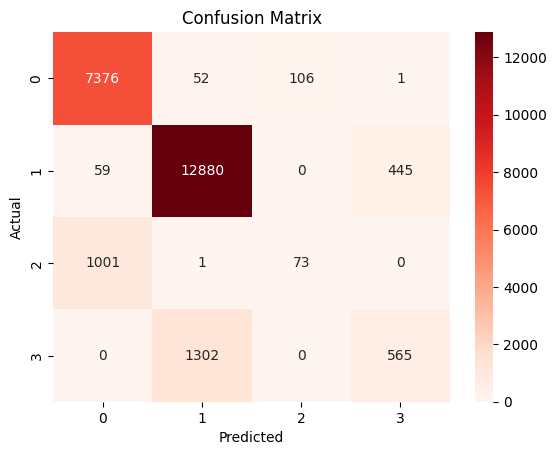

In [115]:
sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [116]:
#Mucho mejor!

In [117]:
# Salvar el modelo Random Forest Classifier en un archivo pickle.
import pickle
with open('modelo.pkl', 'wb') as f:
    pickle.dump(modeloRF, f)